In [1]:
import pandas
from scipy.io import arff
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from dl85 import DL85Predictor
from dl85 import DL85Classifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import MyCode.utils as utils
import graphviz
from MyCode import relabeling
from MyCode import relabeling_sklearn

In [2]:
pd.set_option('max_columns', None)
FILE_NAME = "relab_Lawsuit"

# src: https://www.kaggle.com/hjmjerry/gender-discrimination
df = pandas.read_csv("dataset_perso/Lawsuit.csv")
del df['ID']
df

,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
0,1,1,0,0,7.4,9,3,77836,84612
1,1,1,0,0,6.7,10,2,69994,78497
2,1,1,0,0,8.1,6,1,62872,67756
3,1,1,1,1,5.1,27,3,155196,173220
4,1,1,0,0,7.0,10,3,89268,96099
...,...,...,...,...,...,...,...,...,...
256,6,0,1,1,2.9,8,2,297174,323699
257,6,0,1,1,2.6,9,3,308081,339664
258,6,0,1,1,2.8,8,1,211269,241577
259,6,0,1,1,2.4,2,1,210801,233905


In [3]:
salary_mean = np.mean(np.array(df["Sal94"].tolist(), float))
for i in range(0,len(df)):
    if df.at[i, "Sal94"] >= salary_mean:
        df.at[i, "Salary_mean"] = 1
    else:
        df.at[i, "Salary_mean"] = 0
del df["Sal94"]
del df["Sal95"]
df

,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Salary_mean
0,1,1,0,0,7.4,9,3,0.0
1,1,1,0,0,6.7,10,2,0.0
2,1,1,0,0,8.1,6,1,0.0
3,1,1,1,1,5.1,27,3,1.0
4,1,1,0,0,7.0,10,3,0.0
...,...,...,...,...,...,...,...,...
256,6,0,1,1,2.9,8,2,1.0
257,6,0,1,1,2.6,9,3,1.0
258,6,0,1,1,2.8,8,1,1.0
259,6,0,1,1,2.4,2,1,1.0


In [4]:
col = ['Rank', 'Dept']
df = df.drop(['Prate', 'Exper'], axis=1)
df = pd.get_dummies(df, columns=col)
df

,Gender,Clin,Cert,Salary_mean,Rank_1,Rank_2,Rank_3,Dept_1,Dept_2,Dept_3,Dept_4,Dept_5,Dept_6
0,1,0,0,0.0,0,0,1,1,0,0,0,0,0
1,1,0,0,0.0,0,1,0,1,0,0,0,0,0
2,1,0,0,0.0,1,0,0,1,0,0,0,0,0
3,1,1,1,1.0,0,0,1,1,0,0,0,0,0
4,1,0,0,0.0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0,1,1,1.0,0,1,0,0,0,0,0,0,1
257,0,1,1,1.0,0,0,1,0,0,0,0,0,1
258,0,1,1,1.0,1,0,0,0,0,0,0,0,1
259,0,1,1,1.0,1,0,0,0,0,0,0,0,1


In [5]:
X = df.loc[:, ~df.columns.isin(['Gender', 'Salary_mean'])]
y = df['Salary_mean']
sensitive = df['Gender']
utils.discrimination(y, sensitive)

82 23 155 106


-0.31205112598904444

In [6]:
for i in range(0,len(df)):
    if df.at[i, "Gender"] == 1:
        df.at[i, "Gender"] = 0
    else:
        df.at[i, "Gender"] = 1
utils.discrimination(y, sensitive)

23 82 106 155


0.31205112598904444

In [7]:
X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = utils.train_test_split(1, X, y, sensitive)

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, list(y_train))
y_pred_train = clf.predict(X_train)
print(clf.tree_.feature)
id = clf.tree_.children_left[0]
print(clf.tree_.feature[id])
id = clf.tree_.children_right[0]
print(clf.tree_.feature[id])
id = clf.tree_.children_left[1]
print(clf.tree_.feature[id])
id = clf.tree_.children_right[1]
print(clf.tree_.feature[id])
id = clf.tree_.children_left[2]
print(clf.tree_.feature[id])
id = clf.tree_.children_right[2]
print(clf.tree_.feature[id])
id = clf.tree_.children_left[3]
print(clf.tree_.feature[id])
id = clf.tree_.children_right[3]
print(clf.tree_.feature[id])

[10  9  1 -2 -2  2 -2 -2 -2]
9
-2
1
2
-2
-2
-2
-2


[Text(313.875, 285.39000000000004, 'X[10] <= 0.5\ngini = 0.479\nsamples = 209\nvalue = [126, 83]'),
 Text(251.10000000000002, 203.85000000000002, 'X[9] <= 0.5\ngini = 0.41\nsamples = 177\nvalue = [126, 51]'),
 Text(125.55000000000001, 122.31, 'X[1] <= 0.5\ngini = 0.147\nsamples = 113\nvalue = [104, 9]'),
 Text(62.775000000000006, 40.76999999999998, 'gini = 0.0\nsamples = 52\nvalue = [52, 0]'),
 Text(188.32500000000002, 40.76999999999998, 'gini = 0.252\nsamples = 61\nvalue = [52, 9]'),
 Text(376.65000000000003, 122.31, 'X[2] <= 0.5\ngini = 0.451\nsamples = 64\nvalue = [22, 42]'),
 Text(313.875, 40.76999999999998, 'gini = 0.17\nsamples = 32\nvalue = [3, 29]'),
 Text(439.42500000000007, 40.76999999999998, 'gini = 0.482\nsamples = 32\nvalue = [19, 13]'),
 Text(376.65000000000003, 203.85000000000002, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]')]

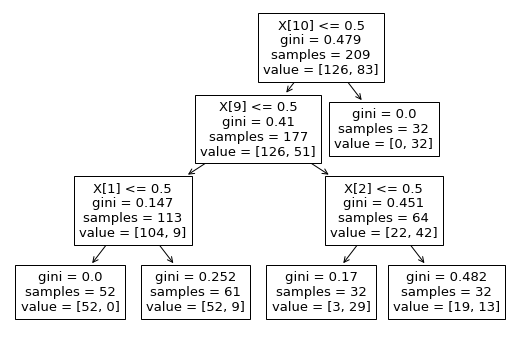

In [9]:
from sklearn import tree

tree.plot_tree(clf)

In [10]:
leafs = list()
cnt = np.unique(sensitive, return_counts=True)[1]
relabeling_sklearn.leafs_to_relabel(clf.tree_, X_train, y_train, sensitive_train, cnt[0], cnt[1], leafs, len(y_train), clf.tree_.feature[0])


In [11]:
for leaf in leafs:
    print(leaf)
    print()

Path: ((10, 'left'), (9, 'left'), (1, 'left')) 
accuracy: -52 
discrimination: -0.12519780888618381 
ratio: 0.0024076501708881503 
contigency: 
[29, 0]
[23, 0]
transactions: [0, 1, 3, 6, 7, 10, 11, 12, 13, 15, 17, 20, 23, 26, 27, 28, 29, 31, 32, 36, 37, 39, 48, 49, 50, 53, 54, 57, 58, 59, 60, 63, 64, 65, 66, 68, 70, 71, 73, 75, 78, 79, 81, 82, 83, 85, 86, 87, 89, 90, 98, 110]

Path: ((10, 'left'), (9, 'left'), (1, 'right')) 
accuracy: -43 
discrimination: -0.05124771758977481 
ratio: 0.0011918073858087166 
contigency: 
[25, 3]
[27, 6]
transactions: [2, 4, 5, 8, 9, 14, 16, 18, 19, 21, 22, 24, 25, 30, 33, 34, 35, 38, 40, 41, 42, 43, 44, 45, 46, 47, 51, 52, 55, 56, 61, 62, 67, 69, 72, 74, 76, 77, 80, 84, 88, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112]

Path: ((10, 'left'), (9, 'right'), (2, 'left')) 
accuracy: -26 
discrimination: -0.12702373706634207 
ratio: 0.004885528348705464 
contigency: 
[1, 4]
[2, 25]
transactions: [113, 114, 115, 116

In [12]:
leafs_relab = relabeling_sklearn.relab(clf.tree_, X_train, y_train, y_pred_train, sensitive_train, 0)
print()
for l in leafs_relab:
    print(l)
    print()

0.23057142857142854
0.07409523809523805
-0.08238095238095244

Path: ((10, 'left'), (9, 'right'), (2, 'right')) 
accuracy: -6 
discrimination: -0.08238095238095239 
ratio: 0.013730158730158731 
contigency: 
[12, 5]
[7, 8]
transactions: [123, 126, 127, 129, 131, 132, 133, 134, 136, 138, 140, 143, 147, 150, 153, 155, 156, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 172, 174, 175, 176]

Path: ((10, 'right'),) 
accuracy: -32 
discrimination: -0.1564761904761905 
ratio: 0.004889880952380953 
contigency: 
[0, 5]
[0, 27]
transactions: [177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208]

Path: ((10, 'left'), (9, 'right'), (2, 'left')) 
accuracy: -26 
discrimination: -0.1564761904761905 
ratio: 0.0060183150183150185 
contigency: 
[1, 4]
[2, 25]
transactions: [113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 128, 130, 135, 137, 139, 141, 142, 144, 145, 146, 148, 149, 

In [13]:
print(len(leafs_relab))
for leaf in leafs_relab:
    relabeling.browse_and_relab(clf.tree_, list(leaf.path))
clf.tree_

3


TypeError: 'sklearn.tree._tree.Tree' object is not subscriptable